# Continuous Distribution Functions- Normal distribution

- Exponential distribution
- T-distribution
- F-distribution
- Logistic distribution
- Lognormal distribution
- Uniform distribution

Author:  Thomas Haslwanter, Feb-2017

In [1]:
# Note: here I use the iPython approach, which is best suited for interactive work
%pylab inline
from scipy import stats
matplotlib.rcParams.update({'font.size': 18})

Populating the interactive namespace from numpy and matplotlib


## Function Definition

The following function will be used to show the different distributions functions

In [2]:
x = linspace(-10,10,201)
def showDistribution(d1, d2, tTxt, xTxt, yTxt, legendTxt, xmin=-10, xmax=10):
    '''Utility function to show the distributions, and add labels and title.'''
    plot(x, d1.pdf(x))
    if d2 != '':
        plot(x, d2.pdf(x), 'r')
        legend(legendTxt)
    xlim(xmin, xmax)
    title(tTxt)
    xlabel(xTxt)
    ylabel(yTxt)
    show()  

## Normal distribution

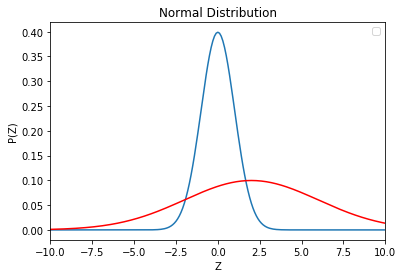

In [3]:
showDistribution(stats.norm, stats.norm(loc=2, scale=4),
                 'Normal Distribution', 'Z', 'P(Z)','')

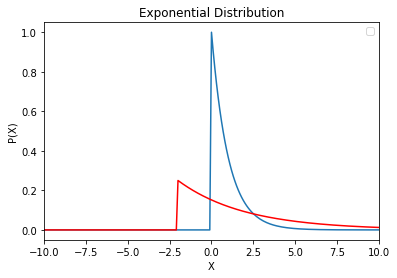

In [4]:
# Exponential distribution
showDistribution(stats.expon, stats.expon(loc=-2, scale=4),
                 'Exponential Distribution', 'X', 'P(X)','')

## Students' T-distribution

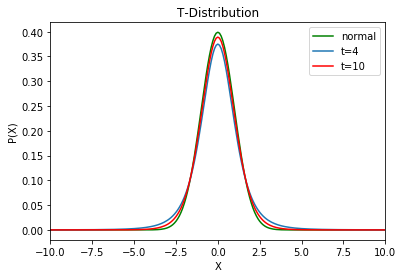

In [5]:
# ... with 4, and with 10 degrees of freedom (DOF)
plot(x, stats.norm.pdf(x), 'g')
showDistribution(stats.t(4), stats.t(10),
                 'T-Distribution', 'X', 'P(X)',['normal', 't=4', 't=10'])

## F-distribution

/home/mad/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1591: RuntimeWarning: divide by zero encountered in log
  lPx = m/2 * np.log(m) + n/2 * np.log(n) + (n/2 - 1) * np.log(x)


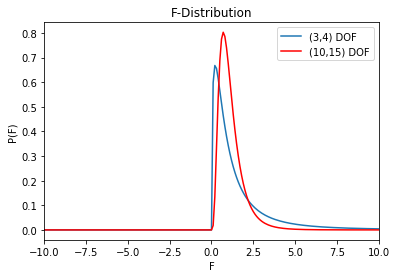

In [6]:
# ... with (3,4) and (10,15) DOF
showDistribution(stats.f(3,4), stats.f(10,15),
                 'F-Distribution', 'F', 'P(F)',['(3,4) DOF', '(10,15) DOF'])

## Uniform distribution

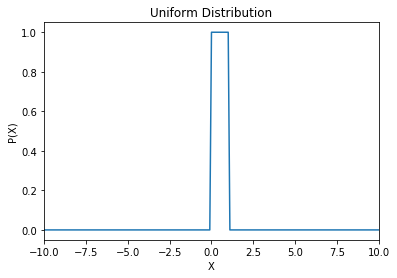

In [7]:
showDistribution(stats.uniform,'' ,
                 'Uniform Distribution', 'X', 'P(X)','')

## Logistic distribution

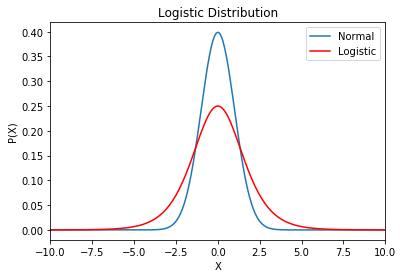

In [8]:
showDistribution(stats.norm, stats.logistic,
                 'Logistic Distribution', 'X', 'P(X)',['Normal', 'Logistic'])

## Lognormal distribution

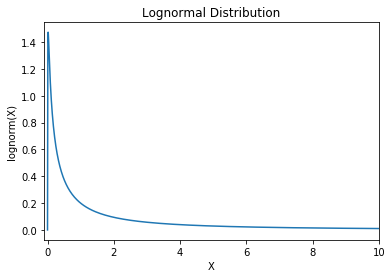

In [9]:
x = logspace(-9,1,1001)+1e-9
showDistribution(stats.lognorm(2), '',
                 'Lognormal Distribution', 'X', 'lognorm(X)','', xmin=-0.1)

Text(0, 0.5, 'lognorm(X)')

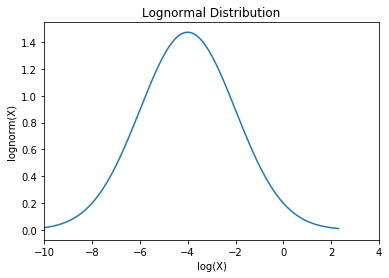

In [10]:
# The log-lin plot has to be done by hand:
plot(log(x), stats.lognorm.pdf(x,2))
xlim(-10, 4)
title('Lognormal Distribution')
xlabel('log(X)')
ylabel('lognorm(X)')

##  Kolmogorov-Smirnov (K-S) tests

Ks_2sampResult(statistic=0.5870646766169154, pvalue=2.6584924846313237e-31)


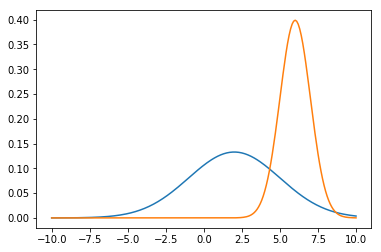

In [55]:
from scipy.stats import ks_2samp  

# Computes the Kolmogorov-Smirnov statistic on 2 samples.
# This is a two-sided test for the null hypothesis that 2 independent samples are drawn 
#   from the same continuous distribution.

# If the K-S statistic is small or the p-value is high, 
#    then we cannot reject the hypothesis that the distributions of the two samples are the same.



x = linspace(-10,10,201)

sample1 = stats.norm.pdf(x,2,3)
sample2 = stats.norm.pdf(x,6,1)

plt.plot(x,sample1)
plt.plot(x,sample2)

print (ks_2samp(sample1,sample2))

## Representations

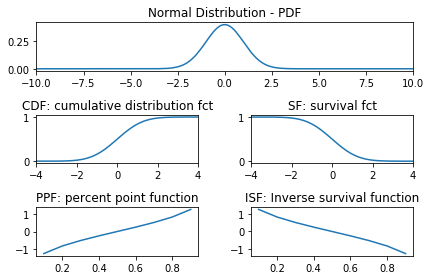

In [59]:
''' Different aspects of a normal distribution'''
# Generate the data
x = linspace(-10,10,201)

rv = stats.norm(0,1)   # random variate


ax = subplot2grid((3,2),(0,0), colspan=2)
plot(x,rv.pdf(x))
xlim([-10,10])
title('Normal Distribution - PDF')

subplot(323)
plot(x,rv.cdf(x))
xlim([-4,4])
title('CDF: cumulative distribution fct')

subplot(324)
plot(x,rv.sf(x))
xlim([-4,4])
title('SF: survival fct')

subplot(325)
plot(x,rv.ppf(x))
title('PPF: percent point function')

subplot(326)
plot(x,rv.isf(x))
title('ISF: Inverse survival function')
tight_layout()
show()

## Random sampling

(array([108., 174., 198., 187., 143.,  93.,  45.,  34.,  11.,   7.]),
 array([0.11125417, 0.45294057, 0.79462697, 1.13631337, 1.47799977,
        1.81968616, 2.16137256, 2.50305896, 2.84474536, 3.18643176,
        3.52811816]),
 <a list of 10 Patch objects>)

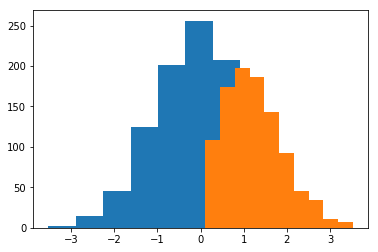

In [69]:
mu = 0
sigma = 1
n = np.random.normal(mu, sigma, 1000)
r = np.random.rayleigh(sigma, 1000)

plt.hist(n)
plt.hist(r)


## Monte Carlo simulations

https://pythonprogramming.net/monte-carlo-simulator-python/

let's consider a basic example. Here, we will consider a gambling scenario, where a user can "roll" the metaphorical dice for an outcome of 1 to 100.

If the user rolls anything from 1-50, the "house" wins. If the user rolls anything from 51 to 99, the "user" wins. If the user rolls a 100, they lose.

With this, the house maintains a mere 1% edge, which is much smaller than the typical house edge, as well as the market edge when incorporating trading costs.


This puts the "house edge" to 1.4 \% right out of the gate. Notably, Scottrade is not the actual house. The house is just not you. This means that, on a long term scale, your bets need to do better than 1.4 \% profit on average, otherwise you will be losing money. Despite the small number, the odds are already against you. Trading is a 50/50 game, especially in the short term.

A monte carlo generator can also help illustrate the flaws of the gambler's fallacy. Many gamblers, and sometimes especially gamblers who understand statistics, fall prey to the gambler's fallacy.

The fallacy asserts that, taking something like the flipping of a coin for heads or tails, you have a known 50/50 odds. That said, if you just flipped heads five times a row, somehow you're more likely to flip tails next.

No matter how many heads have preceeded, your odds, each time you flip the coin are 50/50. It is easy to fall into the trap of thinking that on a long term scale odds will correlate to 50/50 therefor if the odds are imbalanced currently then the next flip's odds are also not 50/50


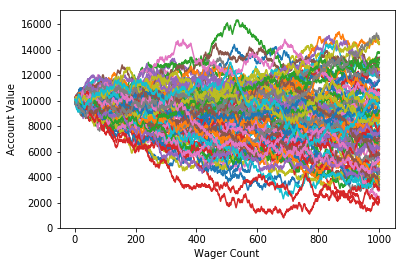

In [70]:
import random
import matplotlib
import matplotlib.pyplot as plt

def rollDice():
    roll = random.randint(1,100)

    if roll == 100:
        return False
    elif roll <= 50:
        return False
    elif 100 > roll >= 50:
        return True


'''
Simple bettor, betting the same amount each time.
'''
def simple_bettor(funds,initial_wager,wager_count):
    value = funds
    wager = initial_wager

    # wager X
    wX = []

    #value Y
    vY = []

    # change to 1, to avoid confusion so we start @ wager 1
    # instead of wager 0 and end at 100. 
    currentWager = 1

    #           change this to, less or equal.
    while currentWager <= wager_count:
        if rollDice():
            value += wager
            # append #
            wX.append(currentWager)
            vY.append(value)
            
        else:
            value -= wager
            # append #
            wX.append(currentWager)
            vY.append(value)

        currentWager += 1
        
    #print 'Funds:', value

    plt.plot(wX,vY)
    


x = 0

# start this off @ 1, then add, and increase 50 to 500, then 1000
while x < 100:
    simple_bettor(10000,100,1000)
    x += 1


plt.ylabel('Account Value')
plt.xlabel('Wager Count')
plt.show()

## Chi-Square

Supppose that you tossed a coin 100 times. Theoretically you would expect 50 tails and 50 heads, however it is pretty unlikely you get that result exactly. Then a question arises... how far off from you expected/theoretical frequency would you have to be in order to conclude that the observed result is statistically significant and is not just due to random variations.

We can begin to think about this question by defining an example set of possible events. We'll call them Events 1 through *k*. Each of these events has an expected (theoretical) frequency and an observed frequency. We can display this as a table:


<table>
<tr>
<th>Event</th>
<th>Event 1</th>
<th>Event 2</th>
<th>Event 3</th>
<th>...</th>
<th>Event k</th>
</tr>
<tr>
<td>Observed Frequency</td>
<td>$$o_1$$</td>
<td>$$o_2$$</td>
<td>$$o_3$$</td>
<td>...</td>
<td>$$o_k$$</td>
</tr>
<tr>
<td>Expected Frequency</td>
<td>$$e_1$$</td>
<td>$$e_2$$</td>
<td>$$e_3$$</td>
<td>...</td>
<td>$$e_k$$</td>
</tr>
</table>

Since we wanted to know whether observed frequencies differ significantly from the expected frequencies we'll have to define a term for a measure of discrepency.

We'll define this measure as Chi-Square, which will be the sum of the squared difference between the observed and expected frequency divided by the expected frequency for all events. To show this more clearly, this is mathematically written as:
$$ \chi ^2 =  \frac{(o_1 - e_1)^2}{e_1}+\frac{(o_2 - e_2)^2}{e_2}+...+\frac{(o_k - e_k)^2}{e_k} $$
Which is the same as:
$$\chi ^2 = \sum^{k}_{j=1} \frac{(o_j - e_j)^2}{e_j} $$

If the total frequency is N

$$ \sum o_j = \sum e_j = N $$

Then we could rewrite the Chi-Square Formula to be:
$$ \chi ^2 = \sum \frac{o_j ^2}{e_j ^2} - N$$

We can now see that if the Chi Square value is equal to zero, then the observed and theoretical frequencies agree exactly. While if the Chi square value is greater than zero, they do not agree.

The sampling distribution of Chi Square is approximated very closely by the *Chi-Square distribution*


Let's go ahead and do an example problem. Say you are at a casino and are in charge of monitoring a [craps](http://en.wikipedia.org/wiki/Craps)(a dice game where two dice are rolled). You are suspcious that a player may have switched out the casino's dice for their own. How do we use the Chi-Square test to check whether or not this player is cheating?

You will need some observations in order to begin. You begin to keep track of this player's roll outcomes.You record the next 500 rolls taking note of the sum of the dice roll result and the number of times it occurs.

You record the following:

<table>
<td>Sum of Dice Roll</td>
<td>2</td>
<td>3</td>
<td>4</td>
<td>5</td>
<td>6</td>
<td>7</td>
<td>8</td>
<td>9</td>
<td>10</td>
<td>11</td>
<td>12</td>
<tr>
<td>Number of Times Observed</td>
<td>8</td>
<td>32</td>
<td>48</td>
<td>59</td>
<td>67</td>
<td>84</td>
<td>76</td>
<td>57</td>
<td>34</td>
<td>28</td>
<td>7</td>
</tr>
</table>


Use Chi-square to test if the dice is fair
